# Trabalho Prático 1
**Grupo 22**

Alexis Correia - A102495 <br>
João Fonseca - A102512


## Exercício 2
Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido .  O grafo tem de ser ligado: entre cada par de nodos  $(n_1,n_2)$ tem de existir um caminho $n_1 -> n_2$ e um caminho $n_2 -> n_1$.

1. Gerar aleatoriamente o grafo com  $N \in \{6..10\}$  nodos e com ramos verificando:
    1. Cada nodo tem um número aleatório de descendentes $d \in \{0..3\}$, cujos destinos são também gerados aleatoriamente.
    2. Se  existirem **“loops”**  ou destinos repetidos, deve-se gerar outro grafo.
    
2. Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

### Resolução
O primeiro passo na resolução deste problema é criar um grafo aleatório de acordo com as intruções acima. E, com auxílio das bibliotecas importadas (nomeadamente `networkx`), podemos desenhar o grafo de forma a facilitar a visualização do mesmo.

{0: [5, 4], 1: [2, 4], 2: [4], 3: [0, 1], 4: [3], 5: [1]}


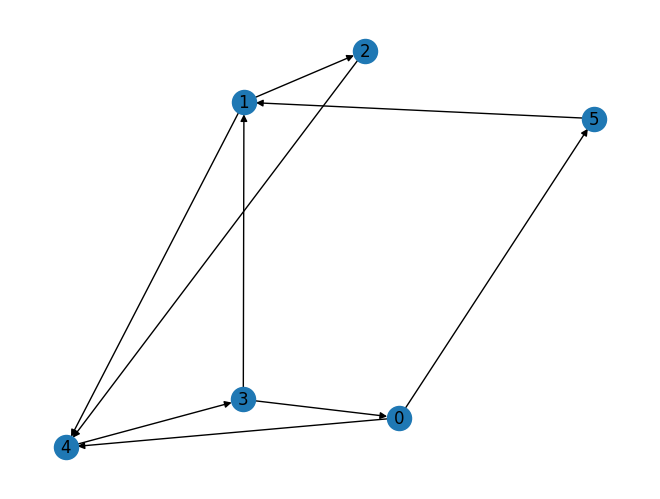

In [18]:
#Inicialização

import networkx as nx
import random
from ortools.linear_solver import pywraplp

#Criação Grafo

random.seed(None)

def cria_adj(N):
    adj = {n: [] for n in range(N)}
    nodes = list(range(N))
    random.shuffle(nodes) # Embaralha a lista com todos os nodos
    
    for i in range(N):
        adj[nodes[i]].append(nodes[(i + 1)%N])
        # Adiciona uma aresta com origem em nodes[i] e destino nodes[(i+1)%N]

    for n in range(N): # Adiciona, no máximo, mais duas arestas com destinos aleatórios (para cada nodo)
        num_arestas = random.randint(0, 2)
        for _ in range(num_arestas):
            d = random.randint(0, N - 1)
            if d != n and d not in adj[n] and n not in adj[d]: # Dessa forma, garantimos que não haja "loops"
                adj[n].append(d)
    
    return adj

N = 6
adj = cria_adj(N)
print(adj)

G = nx.DiGraph(adj) # Criamos o grafo a partir do dicionário "adj"
nx.draw(G, with_labels=True)

Com o grafo criado de forma aleatória, podemos começar a utilizar a programação inteira para determinar quantas arestas do grafo podemos retirar de forma que o grafo permaneça ligado.

In [19]:
solver = pywraplp.Solver.CreateSolver('SCIP')

O=D=N
X={}
for o in range(O):
    for d in range(D):
        X[o,d] = solver.BoolVar(f"X[{o},{d}]")

Agora podemos adicionar as restrições necessárias:
1. qwert
2. qwert
3. qwert
4. qwert

In [24]:

#R1
for o in range(O):
    for d in range(D):
        if d not in adj[o]:
            solver.Add(X[o,d] == 0)

#R2
for o in range(O):
    solver.Add(sum([X[o,d] for d in range(D)])>=1)
    #solver.Add(sum([X[o,d] for d in range(D)])<=2)

#R3
for d in range(D):
    solver.Add(sum([X[o,d] for o in range(O)])>=1)

#R4
for n in range(N):
    solver.Add(sum([X[n,d] for d in range(D)])+sum([X[o,n] for o in range(O)])<=2) #3

Por fim, resolvemos o problema e podemos determinar quantas arestas podem ser removidas do grafo sem que o mesmo deixe de ser ligado.

X | 0 | 1 | 2 | 3 | 4 | 5 | 
0 | 0 | 0 | 0 | 0 | 0 | 1 | 
1 | 0 | 0 | 1 | 0 | 0 | 0 | 
2 | 0 | 0 | 0 | 0 | 1 | 0 | 
3 | 1 | 0 | 0 | 0 | 0 | 0 | 
4 | 0 | 0 | 0 | 1 | 0 | 0 | 
5 | 0 | 1 | 0 | 0 | 0 | 0 | 
Início: 9 arestas
Fim: 6 arestas


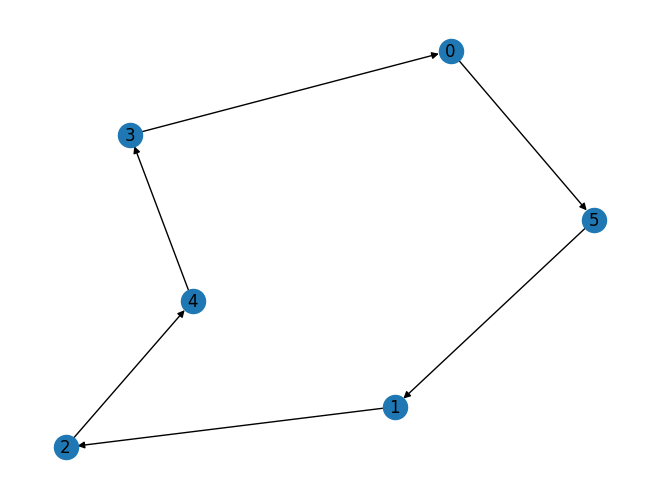

In [25]:

status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print("X", end=" | ")
    for d in range(N):
        print(d, end = " | ")
    print()
    aux = 0
    ed = []
    for o in range(N):
        print(o, end = " | ")
        for d in range(N):
            if X[o,d].solution_value() == 1:
                print("1", end = " | ")
                aux += 1
                ed.append((o,d))
            else:
                print("0", end = " | ")
        print()
    
    R = nx.DiGraph(ed)
    nx.draw(R, with_labels = True)

    print(f"Início: {G.number_of_edges()} arestas")
    print(f"Fim: {aux} arestas")
    #print(f"Resposta: Podemos retirar {G.number_of_edges()-aux} arestas")
else:
    print("ERROR")
